# Ecommerce Customer Churn Analysis and Prediction (E-Commerce-Kundenabwanderungsanalyse und -vorhersage)

<span style="background-color: lightyellow; padding: 5px; display: block;"> The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.</span>

<span style="background-color: lightyellow; padding: 5px; display: block;"> 
The data was extracted from the Kaggle dataset "Ecommerce Customer Churn Analysis and Prediction," provided by Ankit Verma, and published under the CC BY-NC-SA 4.0 license. For further details on the license, please refer to the link provided: https://creativecommons.org/licenses/by-nc-sa/4.0/.


Data source: Ecommerce Customer Churn Analysis and Prediction

License: CC BY-NC-SA 4.0

Source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data </span>

# Importing libraries (Bibliotheken importieren)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# Daten laden
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")

# Data Overview (Datenüberblick)

In [10]:
display(df.head())
print(df.info())
print(df.describe())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
**Structure (Struktur):**  
    
- 5,630 rows (customers) and 19 columns (features) (5630 Zeilen (Kunden) und 19 Spalten (*Eigenschaften*)).

**Data Types (Datentypen):**  
- 8 columns are **integer (int64)** (8 Spalten sind **ganzzahlig (int64)**).  
- 7 columns are floating **point numbers (float64)** (7 Spalten sind **Gleitkommazahlen (float64)**).  
- 5 columns are **categorical/object (object)** (5 Spalten sind **kategorisch/objekt (object)**).

The column **"Churn" / "Customer Attrition"** is our target – to predict! (Die Spalte **"Chrun" / "Abwanderung"** ist unser Ziel – vorherzusagen!)

</span>

In [13]:
# Unnötige Spalte "CustomerID" entfernen
df.drop(columns=['CustomerID'], inplace=True)

In [15]:
print(df.columns)

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


<span style="background-color: lightgrey; padding: 10px; border-radius: 5px; display: block;">
**Spalten auf deutsch:**

'Kundennummer', 'Kündigung', 'Zugehörigkeitsdauer', 'Bevorzugtes Anmeldegerät', 'Stadtstufe',
'Entfernung vom Lagerhaus zum Haus', 'Bevorzugte Zahlungsmethode', 'Geschlecht', 'Stunden auf App verbracht',
'Anzahl registrierter Geräte', 'Bevorzugte Bestellkategorie', 'Zufriedenheitsbewertung',
'Familienstand', 'Anzahl der Adressen', 'Beschwerde',
'Bestellbetragssteigerung seit letztem Jahr', 'Verwendete Gutscheine', 'Bestellanzahl',
'Tage seit letzter Bestellung', 'Cashback-Betrag'</span>

# Visualization (Visualisierung) 

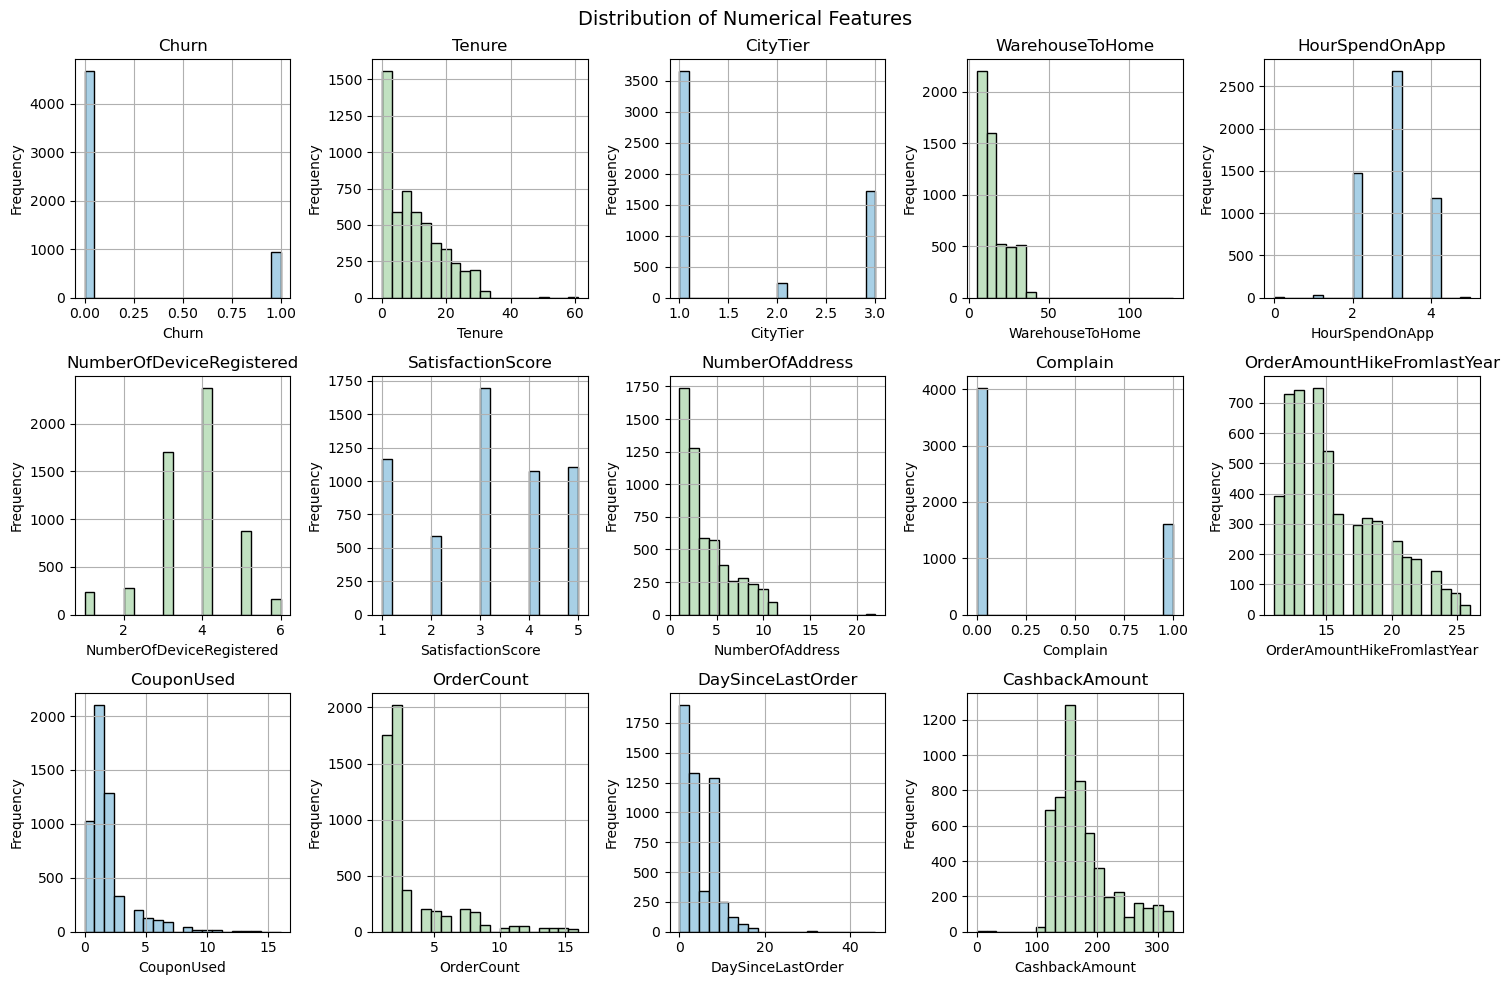

In [19]:
# Farbpalette definieren
colors = ['#C1E1C1', '#A8D0E6']

# Histogramme für jedes numerische Merkmal erstellen
numerische_spalten = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=14)  # Titel: Verteilung numerischer Merkmale

for i, spalte in enumerate(numerische_spalten, 1):
    plt.subplot(3, 5, i)  # 3 Zeilen und 5 Spalten für die Subplots
    color_index = i % len(colors)  # Eine Farbe aus der Palette auswählen
    df[spalte].hist(bins=20, edgecolor='black', color=colors[color_index])  # Histgramm mit Farbe aus der Palette
    plt.title(spalte)
    plt.xlabel(spalte)
    plt.ylabel('Frequency') # **Häufigkeit**
    
plt.tight_layout()  # Die Plots nicht überlappen darstellen
plt.show()

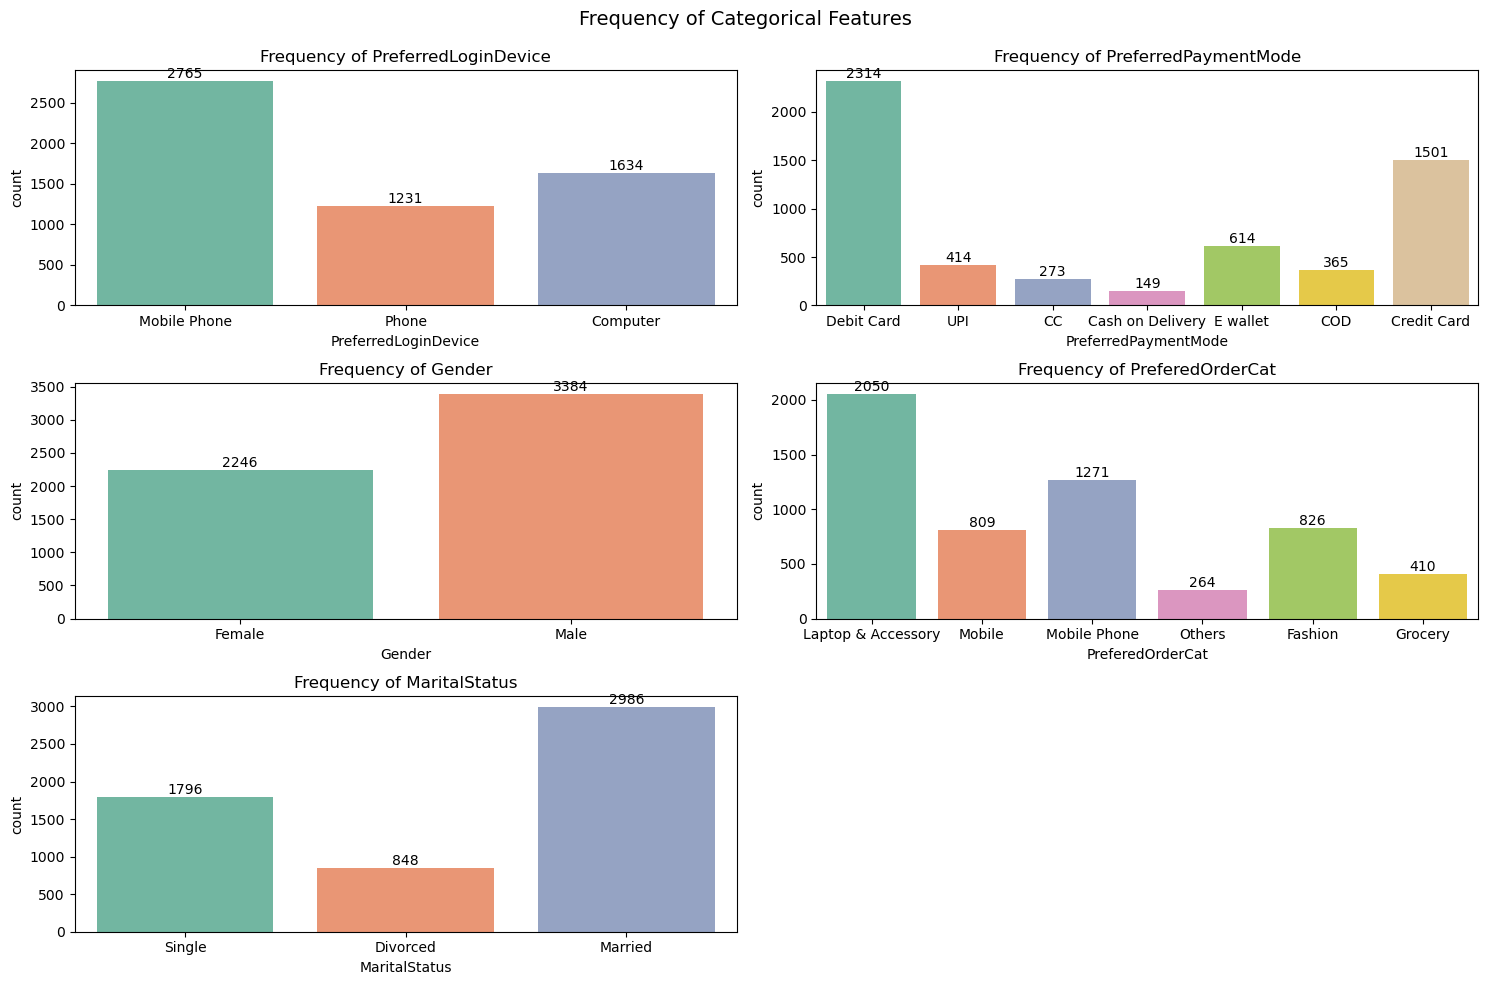

In [20]:
# Balkendiagramme für kategoriale Merkmale
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(15, 10))

# Gemeinsamer Titel **Häufigkeit der kategorischen Merkmale** 
plt.suptitle('Frequency of Categorical Features', fontsize=14)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    
    # Dynamische Anpassung der Farbpalette basierend auf der Anzahl der Kategorien in der Spalte
    num_categories = df[col].nunique()  # Zählt die einzigartigen Kategorien in der Spalte
    colors = sns.color_palette("Set2", num_categories)  # Setzt eine Farbpalette mit der Anzahl der Kategorien
    
    # Countplot mit hue = col
    ax = sns.countplot(data=df, x=col, hue=col, palette=colors)
    plt.title(f'Frequency of {col}') # **Häufigkeit von**
    
    # Entfernen der Gitterlinien
    ax.grid(False)
    
    # Werte neben den Balken hinzufügen
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Um den Titel oben anzupassen
plt.show()

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
**Diese Faktoren könnten mit der Kundenabwanderung korrelieren und die Vorhersage beeinflussen:**  
    
- **Anmeldegerät:** Meist Mobiltelefon (2765), gefolgt von Computer (1634).
- **Zahlungsmethoden:** Debitkarte am häufigsten (2314), dann Kreditkarte (1501).
- **Geschlecht:** Mehr Männer (3384) als Frauen (2246).
- **Kaufpreferenzen:** Laptop & Zubehör am beliebtesten (2050).
- **Familienstand:** Mehrheit verheiratet (2986).

</span>

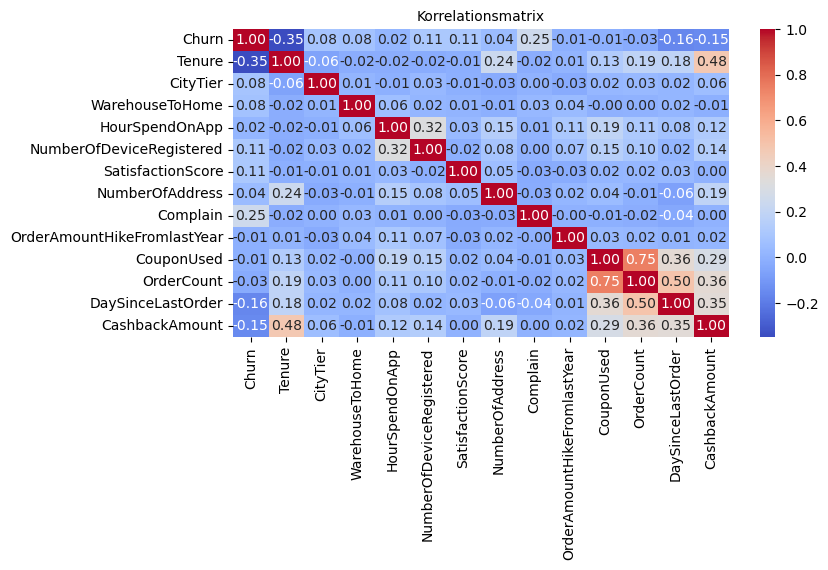

In [22]:
# Nur numerische Spalten für die Korrelationsmatrix auswählen
df_numeric = df.select_dtypes(include=['number'])

# Heatmap mit den numerischen Spalten erstellen
plt.figure(figsize=(8, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix", fontsize=10)
plt.show()

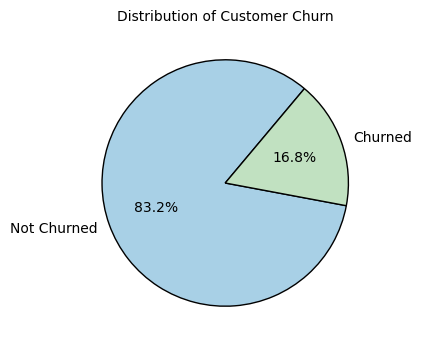

In [23]:
# Zähle die Anzahl der Kunden in jeder Churn-Klasse (0 und 1)
churn_counts = df['Churn'].value_counts()

# Erstelle ein Kreisdiagramm
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], # **Nicht Abgewandert, Abgewandert**
        colors=['#A8D0E6', '#C1E1C1'], autopct='%1.1f%%', startangle=50, wedgeprops={'edgecolor': 'black'})

# Titel hinzufügen
plt.title("Distribution of Customer Churn", fontsize=10) # **Verteilung der Kundenabwanderung**

# Zeige das Diagramm an
plt.show()

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Insgesamt verfügt das Unternehmen über eine solide Basis an loyalen Kunden (83,2 %), auf der es aufbauen kann.</span>

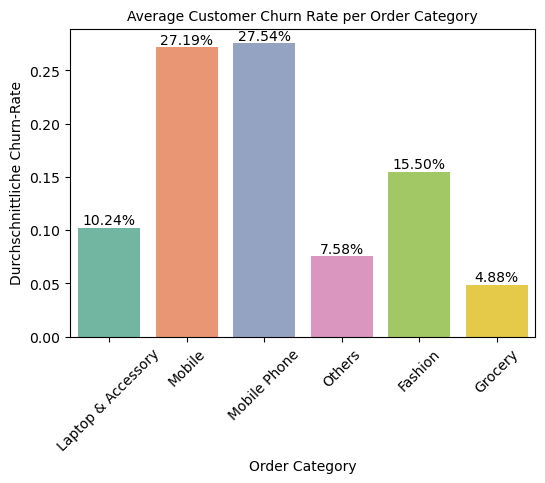

In [26]:
plt.figure(figsize=(6, 4))

# Die Anzahl der einzigartigen Kategorien in "PreferedOrderCat" berechnen
num_categories = df["PreferedOrderCat"].nunique()

# Eine Farbpalette basierend auf der Anzahl der Kategorien wählen
colors = sns.color_palette("Set2", num_categories)

# Barplot erstellen mit hue auf die Bestellkategorie gesetzt
ax = sns.barplot(x=df["PreferedOrderCat"], y=df["Churn"], hue=df["PreferedOrderCat"], palette=colors, errorbar=None)

# Rotiert die x-Achsen-Beschriftungen für bessere Lesbarkeit
plt.xticks(rotation=45)

# Achsenbeschriftungen hinzufügen
plt.xlabel("Order Category")  # x-Achse beschriften **Bestellkategorie**
plt.ylabel("Durchschnittliche Churn-Rate")  # y-Achse beschriften **Durchschnittliche Churn-Rate**

# Titel hinzufügen
plt.title("Average Customer Churn Rate per Order Category", fontsize=10) # **Durchschnittliche Kundenabwanderung-Rate pro Bestellkategorie**

# Werte auf den Balken hinzufügen und als Prozentsatz formatieren
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Diagramm anzeigen
plt.show()

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
**Analyse der Kundenabwanderung nach Kaufpreferenzen:**
    
- Höchste Abwanderung: Mobile Phone (27,45%), Mobile (27,19%).
- Mittlere Abwanderung: Fashion (15,50%), Laptop & Accessory (10,24%).
- Geringste Abwanderung: Others (7,58%), Grocery (4,88%).
    
Besonders hohe Churn-Rate in Mobile und Mobile Phone. 
</span>

# Check for missing values (Fehlende Werte überprüfen)

In [33]:
# Fehlende Werte in den Daten überprüfen
missing_values = df.isnull().sum()
print("Missing Values per Column:") # **"Fehlende Werte pro Spalte**
missing_values[missing_values > 0] 

Missing Values per Column:


Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

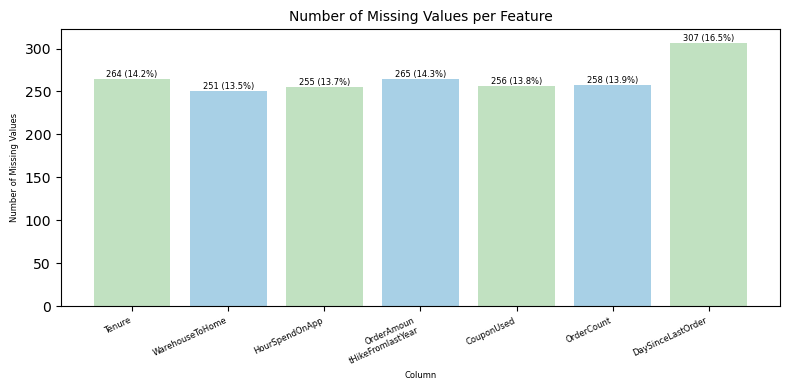

In [35]:
# Berechnung der fehlenden Werte pro Spalte
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Nur Spalten mit fehlenden Werten anzeigen

# Gesamtzahl der fehlenden Werte
total_missing = missing_values.sum()

# Erstellen des Balkendiagramms der fehlenden Werte pro Spalte
plt.figure(figsize=(8, 4))  # Größere Plotgröße für bessere Lesbarkeit

bars = plt.bar(missing_values.index, missing_values, color=['#C1E1C1', '#A8D0E6'])

# Hinzufügen der Werte über den Balken (mit mittiger Platzierung)
for bar in bars:
    value = int(bar.get_height())  # Absoluter Wert
    percentage = (value / total_missing) * 100  # Prozentsatz der fehlenden Werte
    label = f'{value} ({percentage:.1f}%)'  # Beschriftung mit Wert und Prozentsatz
    
    # Platzierung der Textbeschriftungen genau an der richtigen Stelle
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             label,  # Anzeige von Wert und Prozentsatz
             ha='center', 
             va='bottom', fontsize=6)  # Schriftgröße bleibt mittig

# Anpassung der Achsen und Beschriftungen im Balkendiagramm
plt.title('Number of Missing Values per Feature', fontsize=10)  # Größere Schriftgröße für Titel **Anzahl der fehlenden Werte pro Merkmal**
plt.xlabel('Column', fontsize=6)  # Schriftgröße für die X-Achse **Spalten**
plt.ylabel('Number of Missing Values', fontsize=6)  # Schriftgröße für die Y-Achse **Anzahl der fehlenden Wert**

# **Hier ist der Schlüssel:** Schriftgröße für X-Achsen-Beschriftungen reduzieren und optimieren
plt.xticks(rotation=20, fontsize=6, ha='right')  # X-Achsen-Beschriftungen nach rechts ausrichten

# Wenn Beschriftungen immer noch lang sind, könnte man sie auch kürzen oder umformulieren, z.B.:
# Abkürzungen oder Zeilenumbrüche verwenden (optional)
short_labels = [label if len(label) < 20 else label[:10] + '\n' + label[10:] for label in missing_values.index]
plt.xticks(ticks=plt.gca().get_xticks(), labels=short_labels, rotation=25, fontsize=6, ha='right')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">

Die meisten **fehlenden Werte** finden sich in den Spalten

DaySinceLastOrder = „Tage seit letzter Bestellung“ (307) und

OrderAmountHikeFromLastYear = „Bestellbetragssteigerung seit letztem Jahr“ (265).

Andere Spalten wie

Tenure = „Zugehörigkeitsdauer“ (264) und

WarehouseToHome = „Entfernung vom Lager zum Zuhause“ (251)

haben ebenfalls signifikante fehlende Werte.
</span>

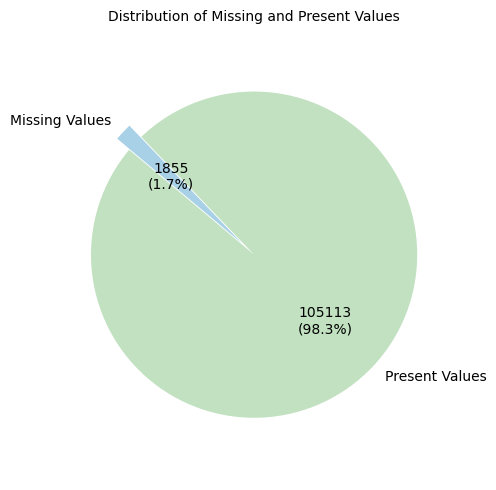

In [38]:
# Berechnung der fehlenden und vorhandenen Werte
missing_data = df.isnull().sum().sum()  # Gesamtanzahl der fehlenden Werte
total_data = df.size  # Gesamtanzahl der Zellen im DataFrame

# Anteile der fehlenden und vorhandenen Werte
sizes = [total_data - missing_data, missing_data]
labels = ['Present Values', 'Missing Values'] ## **Vorhandene Werte, Fehlende Werte**
colors = ['#C1E1C1', '#A8D0E6']  # Sanfte Pastellfarben (hellgrün und hellblau)
explode = (0.1, 0)  # "Explodieren" des ersten Teils des Kreises

# Erstellen des Kreisdiagramms
plt.figure(figsize=(5, 5))  # Größere Plotgröße für das Kreisdiagramm
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda p: f'{int(p * total_data / 100)}\n({p:.1f}%)',  # Werte ohne Klammern, Prozent in Klammern
        startangle=140)

# Gleiches Verhältnis, damit das Diagramm rund bleibt
plt.axis('equal')  

# Titel **Verteilung der fehlenden und vorhandenen Werte** und Layout anpassen
plt.title('Distribution of Missing and Present Values', fontsize=10)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Da 98,4% der Werte vorhanden sind und nur 1,6% fehlen, stellt dies insgesamt eine relativ geringe Menge an fehlenden Werten dar. 

Entscheidung: die fehlenden Werte mit dem Median imputieren.
</span>

In [41]:
# Imputation der fehlenden Werte mit dem Median ohne 'inplace=True'
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].median())
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(df["OrderAmountHikeFromlastYear"].median())
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(df["WarehouseToHome"].median())
df["Tenure"] = df["Tenure"].fillna(df["Tenure"].median())
df["HourSpendOnApp"] = df["HourSpendOnApp"].fillna(df["HourSpendOnApp"].median())
df["CouponUsed"] = df["CouponUsed"].fillna(df["CouponUsed"].median())
df["OrderCount"] = df["OrderCount"].fillna(df["OrderCount"].median())

# Überprüfen, ob noch fehlende Werte vorhanden sind
print(df.isnull().sum())  # Hier sollten nun alle Werte 0 anzeigen.

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Nachdem fehlende Werte durch den Median ersetzt wurden, ist es sinnvoll, eine explorative Datenanalyse (EDA) durchzuführen, um ein besseres Verständnis der Daten zu gewinnen und mögliche Muster, Ausreißer oder Beziehungen zu erkennen.</span>

# Exploratory Data Analysis (EDA) (Explorative Datenanalyse)

In [45]:
# Grundlegende Statistiken anzeigen
df.describe(include='all')

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630,5630.000000,5630.000000,5630,5630,5630.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
unique,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.168384,10.134103,NaN,1.654707,15.566785,NaN,NaN,2.934636,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.221492
std,0.374240,8.357951,NaN,0.915389,8.345961,NaN,NaN,0.705528,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193869
min,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000


<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
**Wichtige Erkenntnisse:**

- **Chrun (Abwanderung):** 16,8% der Kunden sind abgewandert.
    
- **Tenure (Zugehörigkeitsdauer):** Durchschnittlich 10,13 Jahre, mit einer breiten Streuung.

- **PreferredLoginDevice (Bevorzugtes Anmeldegerät):** Mehrheit nutzt ein Mobilgerät.
  
- **WarehouseToHome (Entfernung vom Lagerhaus zum Haus)** Hohe Varianz (5 bis 127 Tage).

- **Gender (Geschlecht):** Mehrheit der Kunden (60%) ist männlich.

- **HourSpendOnApp (Stunden, die in der App verbracht wurden):** Im Durchschnitt 2,93 Stunden.
  
- **SatisfactionScore (Zufriedenheit):** Mittelwert 2,37, tendenziell niedri

- **Complain (Beschwerden:)** Etwa 28,5% der Kunden (1.608 Kunden) haben Beschwerden eingereicht.g.

- **OrderAmountHikeFromlastYear (Bestellbetragsanpassung im Vergleich zum letzten Jahr):** 15,67%, wobei es eine starke Streuung gibt (max. 26% und min. 0%).

- **CouponUsed (Gutschein verwendet):** Im Durchschnitt haben Kunden 1,72 Gutscheine genutzt.

- **OrderCount (Bestellanzahl):** Durchschnittlich 2,96 Bestellungen pro Kunde, wobei der höchste Wert 16 beträgt. Die Streuung deutet darauf hin, dass es eine Mischung von Vielbestellern und Wenigbestellern gibt.

- **DaySinceLastOrder (Tage seit der letzten Bestellung):** Durchschnittlich 4,46 Tage.

- **CashbackAmount (Cashback-Betrag):** Durchschnittlich 177,22 (maximal 325).

</span>

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Analyse der Merkmale mit Einfluss auf die Kundenabwanderung:</span>

# Correlation of Numerical Features with the Target Variable (Korrelation der numerischen Merkmale mit der Zielvariable)

In [50]:
# 1. Numerische Merkmale extrahieren
numerical_features = df.select_dtypes(include=[np.number])

# 2. Korrelationsmatrix berechnen
correlation_matrix = numerical_features.corr()

# 3. Korrelation der Merkmale mit der Zielvariable 'Abwanderung' extrahieren
abwanderung_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# 4. Ergebnisse der Korrelation anzeigen
print('Correlation of Features with the Target Variable "Churn":')  # **Korrelation der Merkmale mit der Zielvariable 'Churn'**
print(abwanderung_correlation)

Correlation of Features with the Target Variable "Churn":
Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
HourSpendOnApp                 0.018816
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
OrderCount                    -0.024038
CashbackAmount                -0.154161
DaySinceLastOrder             -0.155871
Tenure                        -0.337831
Name: Churn, dtype: float64


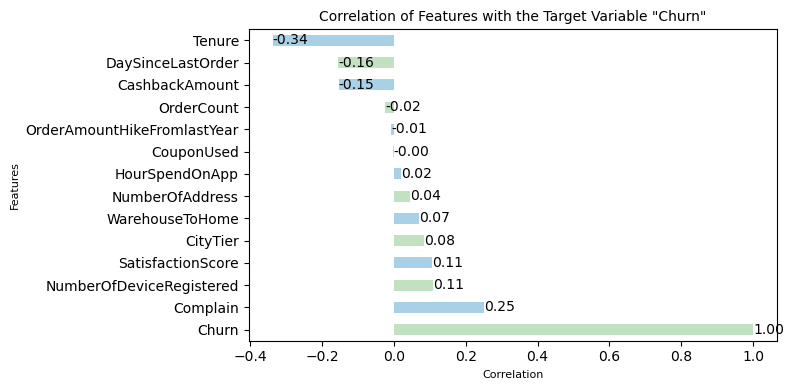

In [52]:
# Visualisierung der Korrelationen als horizontalen Balkendiagramm mit sanften Pastellfarben
plt.figure(figsize=(8, 4))
abwanderung_correlation.plot(kind='barh', color=['#C1E1C1', '#A8D0E6'])

# Werte an den Balken anfügen
for index, value in enumerate(abwanderung_correlation):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.title('Correlation of Features with the Target Variable "Churn"', fontsize=10) # Korrelation der Merkmale mit der Zielvariable "Abwanderung"
plt.xlabel('Correlation', fontsize=8) # **Korrelation**
plt.ylabel('Features', fontsize=8) # **Merkmale**
plt.tight_layout()  # Verhindert, dass die Labels abgeschnitten werden
plt.show()

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
**Die wichtigsten Merkmale, die mit der Abwanderung (Churn) korrelieren, sind:**
    
- **Tenure (Zugehörigkeitsdauer):** Negative Korrelation von -0.34 – Längere Kundenbindung verringert die Abwanderungswahrscheinlichkeit.
  
- **Complain (Beschwerden):** Positive Korrelation von 0.25 – Mehr Beschwerden führen zu höherer Abwanderung.
  
- **CashbackAmount und DaySinceLastOrder:** Negative Korrelationen von -0.15 und -0.16 – Höheres Cashback und kürzere Zeit seit der letzten Bestellung verringern die Abwanderung.
</span>

In [55]:
# One-Hot-Encoding für alle kategorischen Spalten mit mehreren Kategorien
df_encoded = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 
                                          'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

# Label-Encoding für die binäre Spalte 'Gender'
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])

# Überprüfen der Umwandlung
print(df_encoded.dtypes)


Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int32
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                             int64
PreferredLoginDevice_Mobile Phone           bool
PreferredLoginDevice_Phone                  bool
PreferredPaymentMode_COD                    bool
PreferredPaymentMode_Cash on Delivery       bool
PreferredPaymentMode_Credit Card            bool
PreferredPaymentMode

# Data Splitting (Train-Test Split) (Datenaufteilung):

In [58]:
# Features (X) und Zielvariable (y)
X = df_encoded.drop(columns=['Churn'])  # Churn ist die Zielvariable
y = df_encoded['Churn']

# Splitte den Datensatz in Trainings- und Testdaten (80% Training, 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (RandomForestClassifier) (Modelltraining):

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Random Forest ist ein robustes Modell auf Basis mehrerer Entscheidungsbäume und  eignet sich gut für die Vorhersage der Kundenabwanderung, da es hohe Genauigkeit bietet und Overfitting reduziert.
</span>

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Erstelle das RandomForest-Modell
model = RandomForestClassifier(random_state=42)

# Trainiere das Modell mit den Trainingsdaten
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Prediction on the Test Data (Vorhersage auf den Testdaten):

In [78]:
# Vorhersagen für die Testdaten
y_pred = model.predict(X_test)

# Model Evaluation (Measuring Performance) (Modellevaluation):

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Berechne die Genauigkeit (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Zeige die Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Zeige den Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9751
Confusion Matrix:
[[940   1]
 [ 27 158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       941
           1       0.99      0.85      0.92       185

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.95      1126
weighted avg       0.98      0.98      0.97      1126



<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Das Modell erreicht eine hohe Genauigkeit von 97,51%. 

Es erkennt nicht abgewanderte Kunden nahezu perfekt (Precision: 97%, Recall: 100%). 

Bei abgewanderten Kunden zeigt es eine sehr hohe Precision von 99%, jedoch eine etwas niedrigere Recall von 85%, was bedeutet, dass 15% der abgewanderten Kunden nicht erkannt wurden (False Negatives). 

Insgesamt ist das Modell sehr stark, der Recall für abgewanderte Kunden könnte jedoch durch Techniken wie gewichtete Verlustfunktionen oder Oversampling weiter verbessert werden.
</span>

# Feature Importance (Wichtigkeit der Merkmale):

<span style="background-color: lightyellow; padding: 10px; border-radius: 5px; display: block;">
Nach dem Modelltraining werden die wichtigsten Merkmale für die Vorhersage der Abwanderung identifiziert, um die relevanten Einflussfaktoren zu verstehen.
</span>

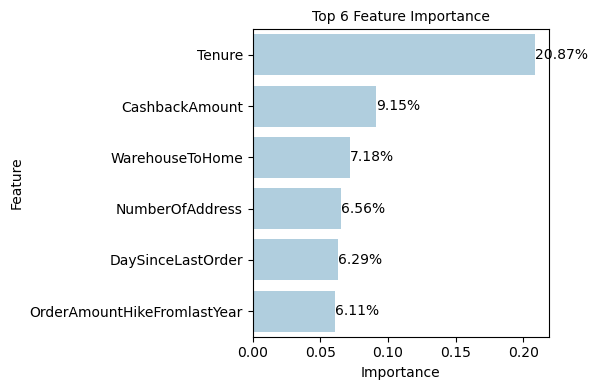

In [97]:
# Feature Importance aus dem Modell extrahieren
feature_importance = model.feature_importances_

# Ein DataFrame, um die Wichtigkeit der Features anzuzeigen
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Nach der Wichtigkeit der Features sortieren und die Top 6 auswählen
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(6)

# Die Feature Importance mit deiner Farbpalette visualisieren
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, color='#A8D0E6')

# Werte auf den Balken hinzufügen (als Prozentsatz)
for p in ax.patches:
    percentage = p.get_width() * 100  # Umwandlung in Prozentsatz
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black')

# Titel und Layout anpassen
plt.title("Top 6 Feature Importance", fontsize=10)
plt.tight_layout()

# Zeige das Diagramm an
plt.show()

# Actionable Recommendations Based on Analysis (Handlungsempfehlungen basierend auf Analyse)

<span style="background-color: #d3f9d8; padding: 10px; border-radius: 5px; display: block;">
    <h2>🔍 Handlungsempfehlungen basierend auf der Analyse</h2>
    <ol>
        <li><b>Kunden mit hoher Abwanderungswahrscheinlichkeit frühzeitig identifizieren</b><br>
            → Nutzen Sie das Modell zur Vorhersage von (*Crun*) und setzen Sie gezielte Maßnahmen ein.
        </li>
        <li><b>Beschwerdemanagement verbessern</b><br>
            → Beschwerden (*Complain*) haben eine hohe Korrelation mit Abwanderung (+0.25).<br>
            → Schnellere Reaktionszeiten und bessere Lösungen für unzufriedene Kunden.
        </li>
        <li><b>Treueprogramme mit Cashback optimieren</b><br>
            → Kunden mit hohem Cashback neigen weniger zur Abwanderung (-0.15).<br>
            → Erhöhen Sie Cashback-Anreize für gefährdete Kunden.
        </li>
        <li><b>Kundenerlebnis durch schnellere Lieferzeiten verbessern</b><br>
            → Kürzere Bestellintervalle erhöhen Kundenbindung (-0.16).<br>
            → Lieferprozesse optimieren.
        </li>
        <li><b>Gezielte Kundenbindung für Neukunden stärken</b><br>
            → Längere Kundenbeziehungen (*Tenure*) reduzieren Abwanderung (-0.34).<br>
            → Spezielle Angebote für neue Kunden entwickeln.
        </li>
        <li><b>Personalisierte Rabatte & Gutscheine anbieten</b><br>
            → Kunden mit mehr genutzten Gutscheinen (*CouponUsed*) bleiben häufiger.<br>
            → Personalisierte Gutscheinangebote könnten die Kundenbindung stärken.
        </li>
    </ol>
</span>